## Online News Popularity

### Problem Statement:

- The main aim of this project is to predict the future popularity of news article prior to its publication estimating the no. of likes,shares and comments etc..(features of an article) . The dataset is publically available at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#. So my goal is to predict the online news article popularity. Here I am using classification models to find the accuracy of each model and select the best model with high accuracy to predict the popularity. Here the input parameters are training data that we took and the output will be whether the news article is going to be popular or not.

### Solution Statement:

- Here, I am predicting the popularity of the online news from the selected dataset. For predicting, we will use different classification models.

- In this project, I will implement a classification task for online news popularity prediction using python and machine learning toolbox sklearn. Then we will find the accuracy score for each model. I explore the dataset by using read_csv and for visualization which helps me to better understand the solution, I used matplotlib.pyplot.

### Benchmark Model:

- Benchmark model is a model which we will take as reference and achieve the best result than the benchmark model .Here Accuracy score will be compared among the different classification models(Adaboost,Random Forest,Logistic regression) and the best model is selected.

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [140]:
# read the data file
df=pd.read_csv("D:/AI_ML Course/summer internship data/News/news.csv")
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0


In [141]:
# remove space in column
df.columns = df.columns.str.replace(' ', '')

In [4]:
# checking shape
df.shape

(8511, 61)

In [5]:
# read the columns name
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [6]:
# read the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8511 entries, 0 to 8510
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            8511 non-null   object 
 1   timedelta                      8511 non-null   float64
 2   n_tokens_title                 8511 non-null   float64
 3   n_tokens_content               8511 non-null   float64
 4   n_unique_tokens                8511 non-null   float64
 5   n_non_stop_words               8511 non-null   float64
 6   n_non_stop_unique_tokens       8511 non-null   float64
 7   num_hrefs                      8511 non-null   float64
 8   num_self_hrefs                 8511 non-null   float64
 9   num_imgs                       8511 non-null   float64
 10  num_videos                     8511 non-null   float64
 11  average_token_length           8511 non-null   float64
 12  num_keywords                   8511 non-null   f

In [7]:
# read description
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,8511.000000,8511.000000,8511.000000,8511.000000,8511.000000,8511.000000,8511.000000,8511.000000,8511.000000,8511.000000,...,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000
mean,653.905769,9.763953,480.123135,0.561722,0.991658,0.704537,9.620256,3.228175,3.597932,1.228058,...,0.098633,0.762865,-0.253786,-0.485351,-0.113154,0.273500,0.081225,0.348659,0.153195,3276.490599
std,46.699092,1.958524,397.579228,0.120082,0.090959,0.122933,9.992198,4.413750,7.644942,4.508594,...,0.071665,0.227036,0.126297,0.276178,0.098308,0.324496,0.262122,0.187160,0.227672,12242.604582
min,570.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,4.000000
25%,613.000000,8.000000,221.000000,0.488545,1.000000,0.644084,4.000000,1.000000,0.000000,0.000000,...,0.050000,0.600000,-0.322222,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,1000.000000
50%,657.000000,10.000000,354.000000,0.561265,1.000000,0.710306,7.000000,2.000000,1.000000,0.000000,...,0.100000,0.800000,-0.247222,-0.500000,-0.100000,0.100000,0.000000,0.500000,0.000000,1600.000000
75%,695.000000,11.000000,621.000000,0.634743,1.000000,0.777778,12.000000,4.000000,1.000000,1.000000,...,0.100000,1.000000,-0.178125,-0.291667,-0.050000,0.500000,0.150000,0.500000,0.250000,2900.000000
max,731.000000,18.000000,4125.000000,1.000000,1.000000,1.000000,171.000000,74.000000,99.000000,75.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,690400.000000


In [8]:
# checking null value
df.isnull().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              1
title_sentiment_polarity        1
abs_title_subjectivity          1
abs_title_sentiment_polarity    1
shares                          1
Length: 61, dtype: int64

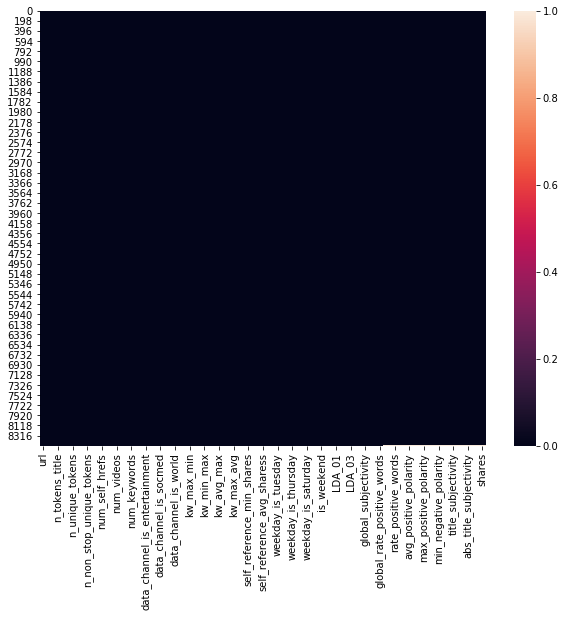

In [9]:
# Visualize the null value using heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

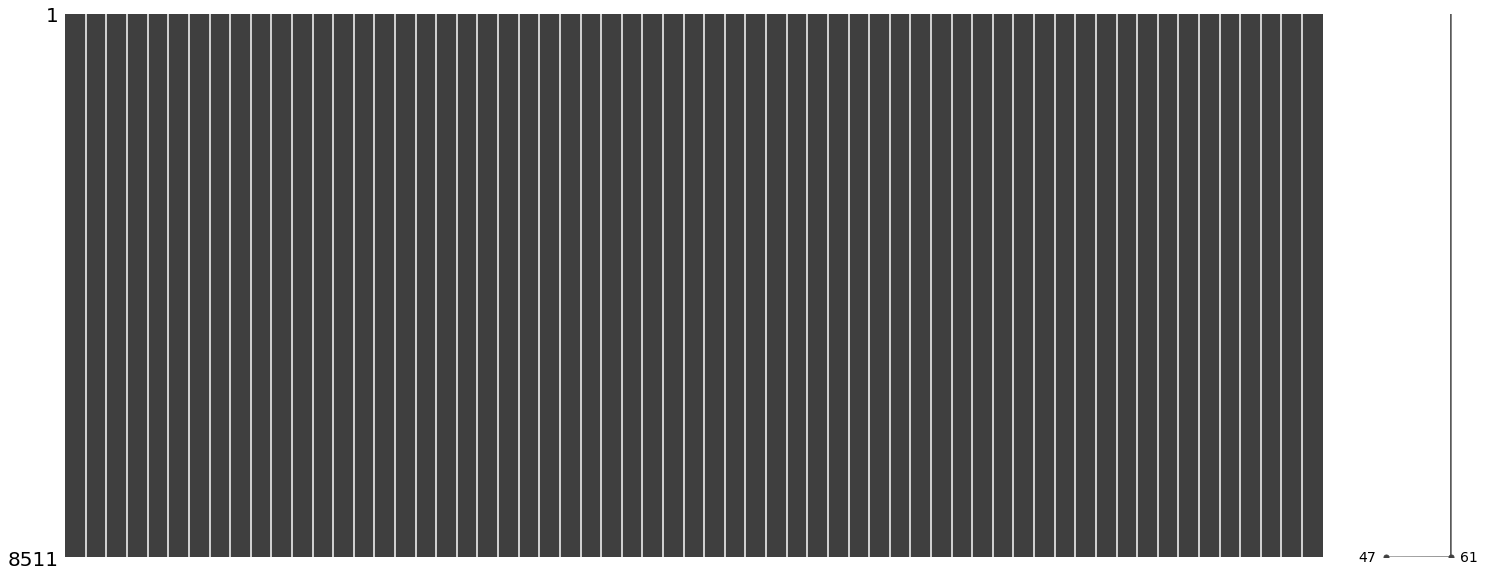

In [10]:
import missingno as msno
msno.matrix(df)

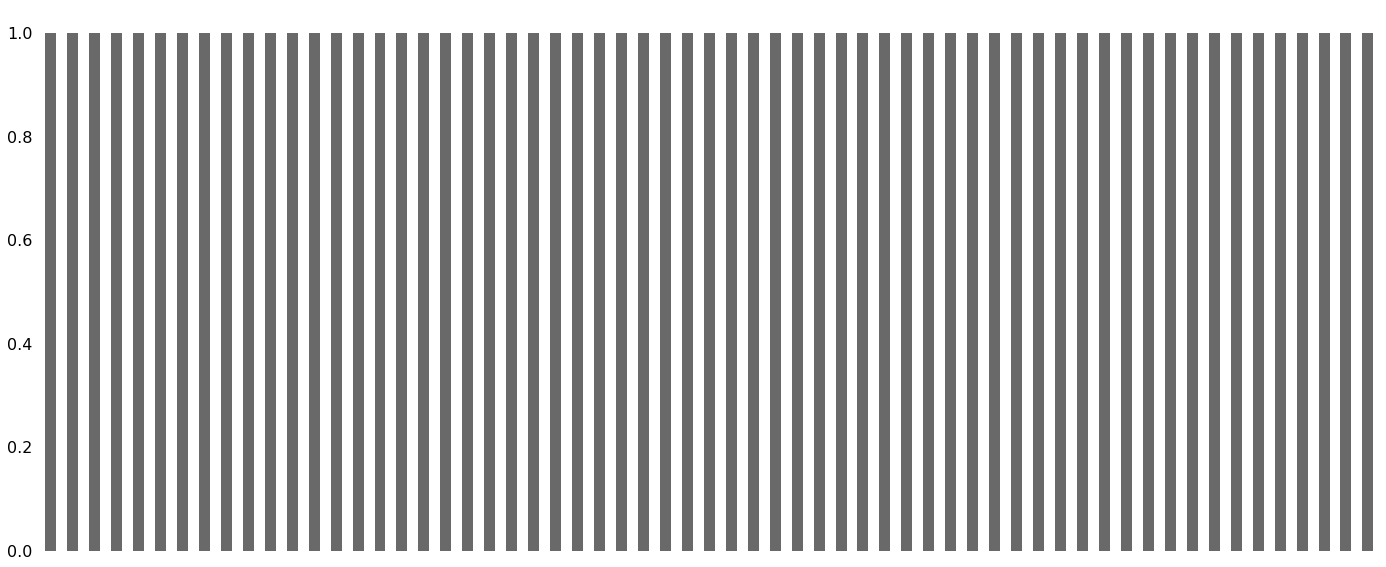

In [11]:
msno.bar(df)

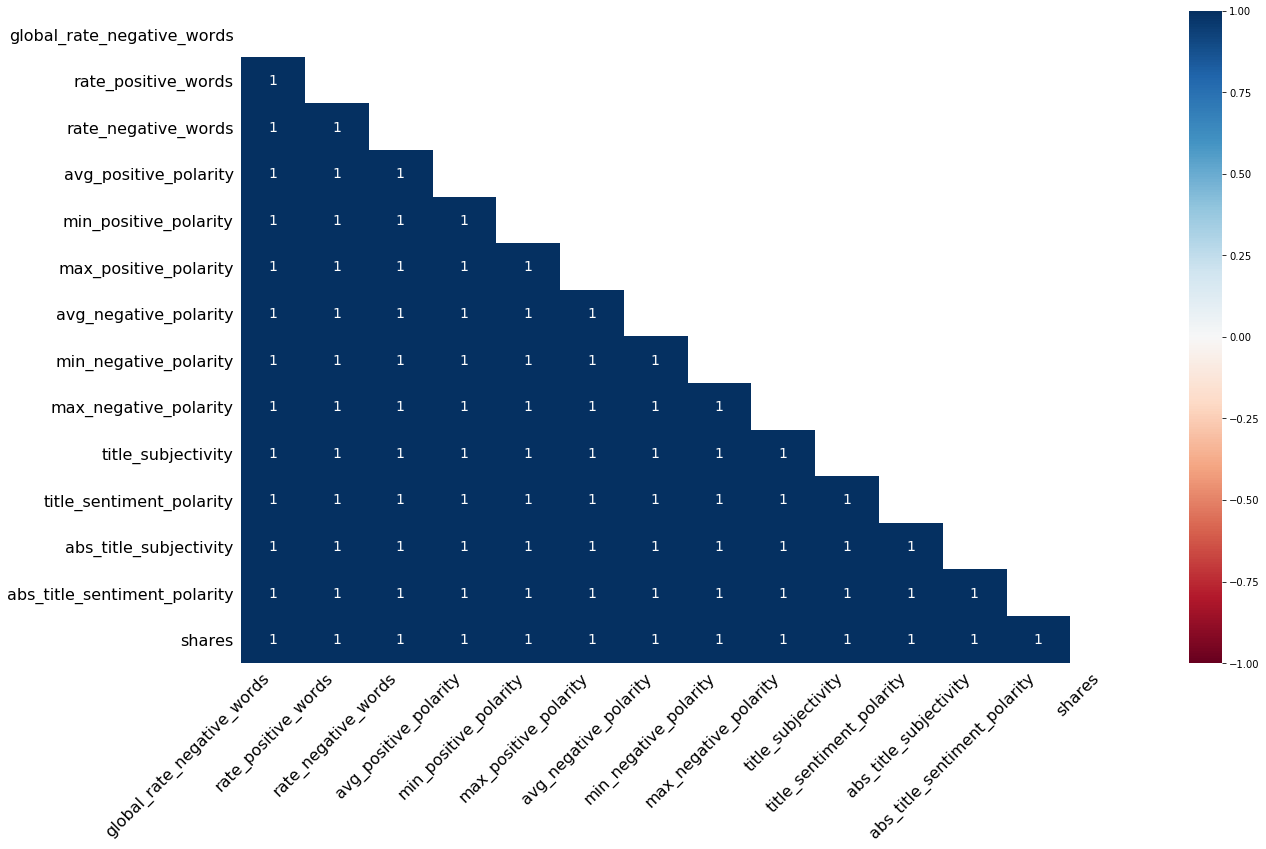

In [12]:
msno.heatmap(df)

In [13]:
# fill the null value using mean
df.fillna(df.mean(),inplace=True)

In [14]:
# checking null value after fill null value
df.isnull().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64

In [15]:
# read the target value
df.shares.value_counts()

1200.0     436
1100.0     435
1400.0     365
1300.0     364
1500.0     329
          ... 
14000.0      1
381.0        1
19100.0      1
521.0        1
300.0        1
Name: shares, Length: 961, dtype: int64

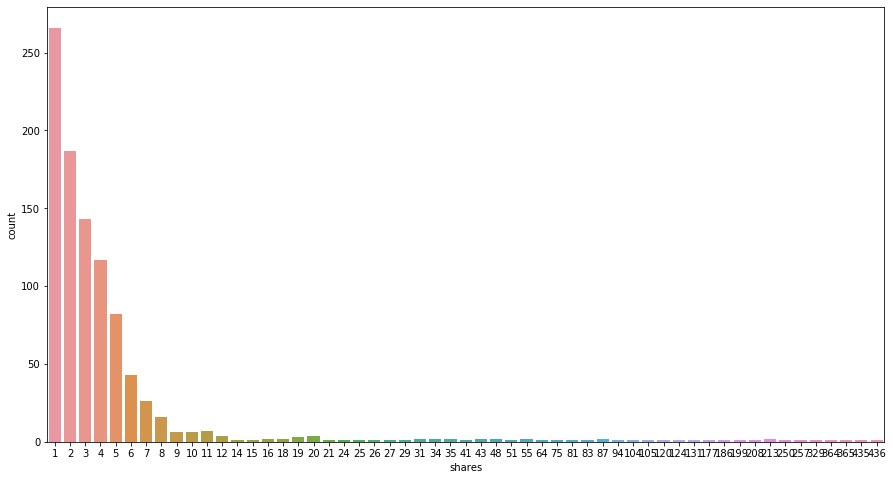

In [16]:
# visualize the target value using countplot
plt.figure(figsize=(15,8))
sns.countplot(df.shares.value_counts())

In [144]:
# read target variable
popularity_raw = df[df.keys()[-1]]

# use the labelEncoder for popular or not use of 1400 shares
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
popular_label=pd.Series(lr.fit_transform(popularity_raw>=1400))
popular_label

0       0
1       0
2       1
3       0
4       0
       ..
8506    0
8507    0
8508    0
8509    1
8510    0
Length: 8511, dtype: int32

In [18]:
# drop unnecessary columns and share is target columns
X=df.drop(['shares','url','timedelta'],axis=1)

In [19]:
# split the data train for 70% and test for 30%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,popular_label,test_size=0.3)

In [20]:
# check shape of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5957, 58)
(2554, 58)
(5957,)
(2554,)


## Apply Logistic Regression Model

In [21]:
# Apply the model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [22]:
#predict the train data
y_pred=lr.predict(X_train)

In [23]:
# find the accuracy on train data
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           0       0.01      0.47      0.03        72
           1       0.99      0.59      0.74      5885

    accuracy                           0.59      5957
   macro avg       0.50      0.53      0.38      5957
weighted avg       0.98      0.59      0.73      5957



In [24]:
# find the accuracy on test data
y_pred_test=lr.predict(X_test)
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.02      0.43      0.03        44
           1       0.98      0.58      0.73      2510

    accuracy                           0.58      2554
   macro avg       0.50      0.51      0.38      2554
weighted avg       0.97      0.58      0.72      2554



## Apply AdaBoosting Classifier

In [25]:
# use of adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)
y_train_pred=abc.predict(X_train)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.49      0.62      0.55      1901
           1       0.80      0.69      0.74      4056

    accuracy                           0.67      5957
   macro avg       0.64      0.66      0.65      5957
weighted avg       0.70      0.67      0.68      5957



In [27]:
y_test_pred_test=abc.predict(X_test)
print(classification_report(y_test_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.47      0.59      0.52       862
           1       0.76      0.67      0.71      1692

    accuracy                           0.64      2554
   macro avg       0.62      0.63      0.62      2554
weighted avg       0.66      0.64      0.65      2554



## Apply Random Forest Classifier Model

In [28]:
# use of Random Classifer
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
pred=lr.predict(X_train)
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(pred,y_train)

0.5922444183313749

In [30]:
print(classification_report(pred,y_train))

              precision    recall  f1-score   support

           0       0.01      0.47      0.03        72
           1       0.99      0.59      0.74      5885

    accuracy                           0.59      5957
   macro avg       0.50      0.53      0.38      5957
weighted avg       0.98      0.59      0.73      5957



In [31]:
test_pred=lr.predict(X_test)
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.02      0.43      0.03        44
           1       0.98      0.58      0.73      2510

    accuracy                           0.58      2554
   macro avg       0.50      0.51      0.38      2554
weighted avg       0.97      0.58      0.72      2554



## Apply GradientBoosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate = 1)
gbc.fit(X_train,y_train)
gbc_pred=gbc.predict(X_train)

In [58]:
print(classification_report(gbc_pred,y_train))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2404
           1       0.93      0.89      0.91      4405

    accuracy                           0.88      6809
   macro avg       0.87      0.88      0.88      6809
weighted avg       0.89      0.88      0.88      6809



In [59]:
ypred_test=gbc.predict(X_test)
print(classification_report(ypred_test,y_test))

              precision    recall  f1-score   support

           0       0.38      0.66      0.48       516
           1       0.78      0.53      0.63      1186

    accuracy                           0.57      1702
   macro avg       0.58      0.60      0.56      1702
weighted avg       0.66      0.57      0.59      1702



In [139]:
# Apply cross valdation score 
from sklearn.model_selection import cross_val_score
cross_val_score(gbc,X_test,y_test,cv=3)

array([0.61619718, 0.61375661, 0.61552028])

## Apply KNeighbors Classsifier model

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(X_train,y_train)

knn_pred=knn.predict(X_train)

In [93]:
print(classification_report(knn_pred,y_train))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69      2259
           1       0.86      0.80      0.83      4550

    accuracy                           0.78      6809
   macro avg       0.76      0.77      0.76      6809
weighted avg       0.79      0.78      0.78      6809



In [94]:
knn_test_pred=knn.predict(X_test)
print(classification_report(knn_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.32      0.57      0.41       502
           1       0.73      0.49      0.59      1200

    accuracy                           0.52      1702
   macro avg       0.53      0.53      0.50      1702
weighted avg       0.61      0.52      0.54      1702



### Apply Kfold On Kneighbors Clssifier model

In [150]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)
kfold.get_n_splits(X,popular_label)

5

In [151]:
model_knn=KNeighborsClassifier(n_neighbors=9,metric='euclidean')
score=[]

for train_index,test_index in kfold.split(X,popular_label):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=popular_label.iloc[train_index],popular_label.iloc[test_index]
    
    # pass the X_train,y_train in to knn algorithm
    model_knn.fit(X_train,y_train)
    # predict the model on test data(x_test,y_test)
    y_pred_test=model_knn.predict(X_test)
    
    # accuracy score of pridicted value(y_pred_test) and A.V(y_test)
    accuracy=accuracy_score(y_test,y_pred_test)
    score.append(accuracy)
score

[0.5637110980622431,
 0.5752056404230317,
 0.5746180963572268,
 0.5129259694477086,
 0.5205640423031728]

## Apply Decision Tree classifier Model

In [95]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

tree_pred=tree.predict(X_train)

In [96]:
print(classification_report(tree_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2592
           1       1.00      1.00      1.00      4217

    accuracy                           1.00      6809
   macro avg       1.00      1.00      1.00      6809
weighted avg       1.00      1.00      1.00      6809



In [98]:
tree_test_pred=tree.predict(X_test)
print(classification_report(tree_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.43      0.60      0.50       637
           1       0.68      0.52      0.59      1065

    accuracy                           0.55      1702
   macro avg       0.55      0.56      0.54      1702
weighted avg       0.59      0.55      0.55      1702



In [101]:
# KFOLD CV:
from sklearn.model_selection import cross_val_score
cross_val_score(tree,X_test,y_test,cv=5)

array([0.58064516, 0.52199413, 0.55588235, 0.54117647, 0.55      ])

### Apply Grid Search on DecisionTree Classifier

In [102]:
# Hyperparameters
# GridSearchCV--->find optimum parameters
grid_param={'criterion':['gini','entropy'],
           'max_depth':range(2,10,1),
           'min_samples_leaf':range(1,10,1)}


In [103]:
from sklearn.model_selection import GridSearchCV

# initialization
grid_search=GridSearchCV(estimator=tree,param_grid=grid_param)

# Appling gridsearch on to dataset
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 10)})

In [104]:
# return the optimal parameters
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}

In [129]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=1)

# we need to fit the model to the data
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [130]:
# Prediction on the test data
pred_test=clf.predict(X_test)
# Classification of actual value and predicte value(GridSearch)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.70      0.38      0.49       897
           1       0.54      0.82      0.65       805

    accuracy                           0.59      1702
   macro avg       0.62      0.60      0.57      1702
weighted avg       0.63      0.59      0.57      1702



## Conclusion:-

- WE find the best model Decision Tree Where got 100 % Accuracy on Train Data And 59% Accuracy on test data
- And also bet model Gradient Boosting Classifier whre got 88% Accuracy on train data and 57 % on test data